### Load reuters dataset

In [2]:
from keras.datasets import reuters

In [3]:
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [4]:
train_data.shape,test_data.shape

((8982,), (2246,))

### Preprocessing data

In [6]:
import numpy as np 


def feature_vectorize(sequences,dimension =10000):
    result = np.zeros((sequences.shape[0],dimension))
    for i,seq in enumerate(sequences):
        result[i,seq]=1
    return result

x_train = feature_vectorize(train_data)
x_test = feature_vectorize(test_data)

y_train = np.array(train_label).astype('float32')
y_test = np.array(test_label).astype('float32')

# set aside 1000 rows for validation

x_val = x_train[:1000]
y_val = y_train[:1000]

x_partial_train = x_train[1000:]
y_partial_train = y_train[1000:]







    



### Model architecture

In [8]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='sigmoid'))




In [10]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(x_partial_train,y_partial_train,epochs=20,batch_size = 512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.1180 - accuracy: 0.9573 - val_loss: 1.0006 - val_accuracy: 0.8030
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.1125 - accuracy: 0.9575 - val_loss: 1.0257 - val_accuracy: 0.7970
Epoch 3/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.1075 - accuracy: 0.9592 - val_loss: 1.0040 - val_accuracy: 0.8090
Epoch 4/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.1054 - accuracy: 0.9582 - val_loss: 1.0269 - val_accuracy: 0.8060
Epoch 5/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.1016 - accuracy: 0.9574 - val_loss: 1.0430 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.1045 - accuracy: 0.9577 - val_loss: 1.0159 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss

### Plot loss , accuracy

In [13]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

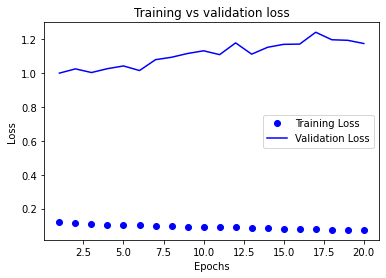

In [17]:
import matplotlib.pyplot as plt

epochs = range(1,len(hist_dict['loss'])+1)
trn_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

plt.plot(epochs,trn_loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training vs validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs validation loss')
plt.legend()
plt.show()

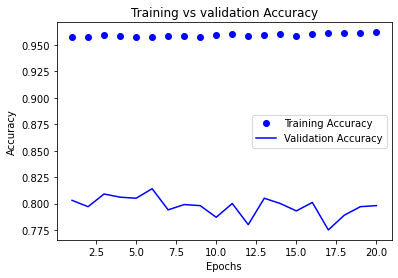

In [19]:
#epochs = range(1,len(hist_dict['loss'])+1)
plt.clf()
trn_acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']

plt.plot(epochs,trn_acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training vs validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('Training vs validation loss')
plt.legend()
plt.show()

In [22]:
# it seems from above that 3 epochs are optimum

model.fit(x_partial_train,y_partial_train,epochs=3,batch_size = 512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/3
7982/7982 [==============================] - 2s 206us/step - loss: 0.0646 - accuracy: 0.9625 - val_loss: 1.2846 - val_accuracy: 0.7840
Epoch 2/3
7982/7982 [==============================] - 1s 135us/step - loss: 0.0638 - accuracy: 0.9620 - val_loss: 1.2762 - val_accuracy: 0.7910
Epoch 3/3
7982/7982 [==============================] - 1s 141us/step - loss: 0.0613 - accuracy: 0.9624 - val_loss: 1.2943 - val_accuracy: 0.7890


In [23]:
model.evaluate(x_test,y_test)

2246/2246 [==============================] - 0s 147us/step


[1.5605138331147463, 0.7684773206710815]